**1] IMPORTING LIBRARIES:**

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\hi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Some basics for Case Study: 

 ##### With Numpy and Pandas

**2] READING FILE:**

In [2]:
data=pd.read_csv('D:/PGP_DSE/NPV/500_Person_Gender_Height_Weight_Index.csv')
data.head()

Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

In [3]:
data.tail()

Gender  Height  Weight  Index
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

In [4]:
print(data.shape)

(500, 4)


**3] CHANGING THE NAME:**

In [5]:
data1=data.rename({'Index':'Indices'}, axis=1)
data1.head()

Gender  Height  Weight  Indices
0    Male     174      96        4
1    Male     189      87        2
2  Female     185     110        4
3  Female     195     104        3
4    Male     149      61        3

**5] CHANGING A COLUMN NAME INTO INDEX:**

In [6]:
Data=data.copy()
Data.tail()

Gender  Height  Weight  Index
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

In [7]:
Data.index=Data['Index']

In [8]:
Data.drop('Index', axis=1, inplace=True)

In [9]:
Data.head()

Gender  Height  Weight
Index                        
4        Male     174      96
2        Male     189      87
4      Female     185     110
3      Female     195     104
3        Male     149      61

**6] CHANGING THE NAME OF ANY INDEX:**

In [10]:
Data.rename({4:4.0}, axis=0, inplace=False).head()

Gender  Height  Weight
Index                        
4.0      Male     174      96
2.0      Male     189      87
4.0    Female     185     110
3.0    Female     195     104
3.0      Male     149      61

It's a temprory change into the axis.

**7] I want all the genders and their respective counts, who have high weight**

In [11]:
D=Data.Gender[Data.Weight==Data.Weight.max()]
D

Index
5      Male
5    Female
5      Male
5      Male
5      Male
5    Female
Name: Gender, dtype: object

In [12]:
print('Below is the count of all people gender wise who have highest weight.\n  ')
print(D.value_counts())

Below is the count of all people gender wise who have highest weight.
  
Male      4
Female    2
Name: Gender, dtype: int64


Their respective gender wise counts of higher weight.

**8] I want the heights/Complete data of all people who have higher weight:**

In [13]:
data=pd.read_csv('D:/PGP_DSE/NPV/500_Person_Gender_Height_Weight_Index.csv')
Data2=data.copy()
Data2.head()

Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

In [14]:
S=list(Data2.Gender[Data2.Weight==Data2.Weight.max()].index)
S

[106, 123, 157, 204, 287, 330]

Initially I got the indices of all those who have higher weight. 

In [15]:
Df=Data2.loc[S, ['Index','Height','Weight']]
Df

Index  Height  Weight
106      5     166     160
123      5     184     160
157      5     168     160
204      5     145     160
287      5     178     160
330      5     164     160

**9] I want to check who is in rank according to height change:**

In [16]:
Df['Rank']=Df['Height'].rank(method='dense', ascending=True)

In [17]:
Df

Index  Height  Weight  Rank
106      5     166     160   3.0
123      5     184     160   6.0
157      5     168     160   4.0
204      5     145     160   1.0
287      5     178     160   5.0
330      5     164     160   2.0

**10] I want all the gender wise count of those who are between 140 to 150 meters:**

In [18]:
DH=Data2[(Data2.Height<=150) & (Data2.Height>=140)]
DH['Gender'].value_counts()

Male      43
Female    36
Name: Gender, dtype: int64

**11] I want to change all the weights to their mean of all, who are greater than all mean:**

In [19]:
Data2=data.copy()
Dataco=Data2.copy()

Initially made another file.

In [20]:
Dataco[Dataco.Weight>Dataco.Weight.mean()]['Weight']=Dataco.Weight.mean()
Dataco.head()

Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

Or

In [21]:
Dataco.Weight[Dataco.Weight>Dataco.Weight.mean()]=Dataco.Weight.mean()

Confirmation: Whether value changed or not.

In [22]:
HC=Data2[Data2['Weight']>Data2['Weight'].mean()]
print(len(HC['Weight'].value_counts()))

53


In [23]:
HF=Dataco[Dataco['Weight']>Dataco['Weight'].mean()]
print(len(HF['Weight'].value_counts()))

14


Here both lengths are equal, which means, we have changed their weights.

In [24]:
len(HC['Weight'].value_counts()) is len(HF['Weight'].value_counts())

False

**Dropping multiple rows with specific condition:**

Drop those entries who have 96 weight.

In [25]:
Dataco.drop(list(Dataco.index[Dataco.Weight==96]), axis=0).head(5)

Gender  Height  Weight  Index
1    Male     189      87      2
2  Female     185     106      4
3  Female     195     104      3
4    Male     149      61      3
5    Male     189     104      3

**12] I want to calculat the highest difference between Height and Weight according to gender:**

In [26]:
Data2=data.copy()

In [27]:
Data2['Diff']=Data2.Height-Data2.Weight

Actual phenomenon:

In [28]:
Data2[Data2.Diff==Data2.Diff.max()]

Gender  Height  Weight  Index  Diff
85     Male     198      50      0   148
492  Female     198      50      0   148

In [29]:
Data2.index=Data2['Diff']
Data3=Data2.drop('Diff', axis=1, inplace=False)
Data4=Data3.loc[148,:]
Data4

Gender  Height  Weight  Index
Diff                               
148     Male     198      50      0
148   Female     198      50      0

If you want only the data of maximum difference:

In [30]:
Data5=Data4.reset_index(inplace=False) # Resetting the index into columns:
Data5.iloc[:,1:]

Gender  Height  Weight  Index
0    Male     198      50      0
1  Female     198      50      0

In [31]:
print('Total number male and female are below, who have a highest difference of height and weight: \n ')
print(Data4['Gender'].value_counts())

Total number male and female are below, who have a highest difference of height and weight: 
 
Male      1
Female    1
Name: Gender, dtype: int64


**13] Observe the graphical representation of height and weight:**

**1**

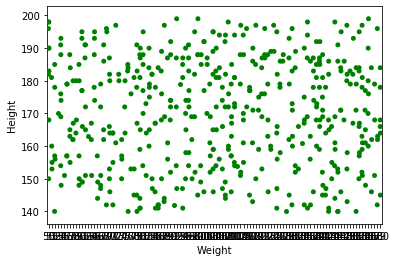

In [32]:
sns.stripplot(data=Data2, x='Weight', y='Height', color='green')
plt.show()

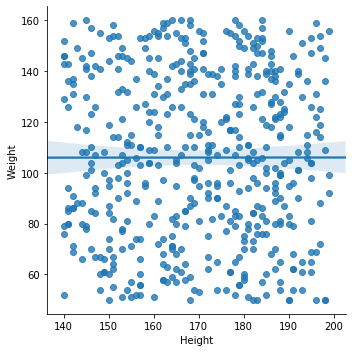

In [33]:
sns.lmplot(data=Data2, y='Weight', x='Height')
plt.show()

Studying these two graphs we conclude that rate of change of height and weight are linear, hence we are getting a normal distribution.

**2**

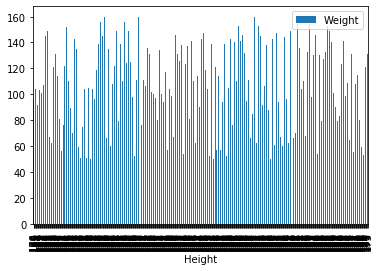

In [34]:
Data_1=Data2.loc[:,['Height','Weight']]
Data5=Data_1.reset_index(inplace=False)
Data5.plot(kind='bar', x='Height', y='Weight')
plt.show()

**Studying this graph is quite difficult, hence we deduce such graph into limited data.**

In [35]:
Data_2=data.loc[1:50, :]
Data_2.head(3)

Gender  Height  Weight  Index
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3

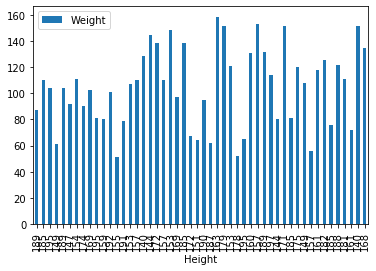

In [36]:
Data_2.plot(kind='bar', x='Height', y='Weight')
plt.show()

Now by looking at the graph, we can make a note that:

**There is a big inconsistency in rate of change in weight  with respect to height.**

-----------------------

--------------------------------

---------------------

# Statistics and Machine Learning

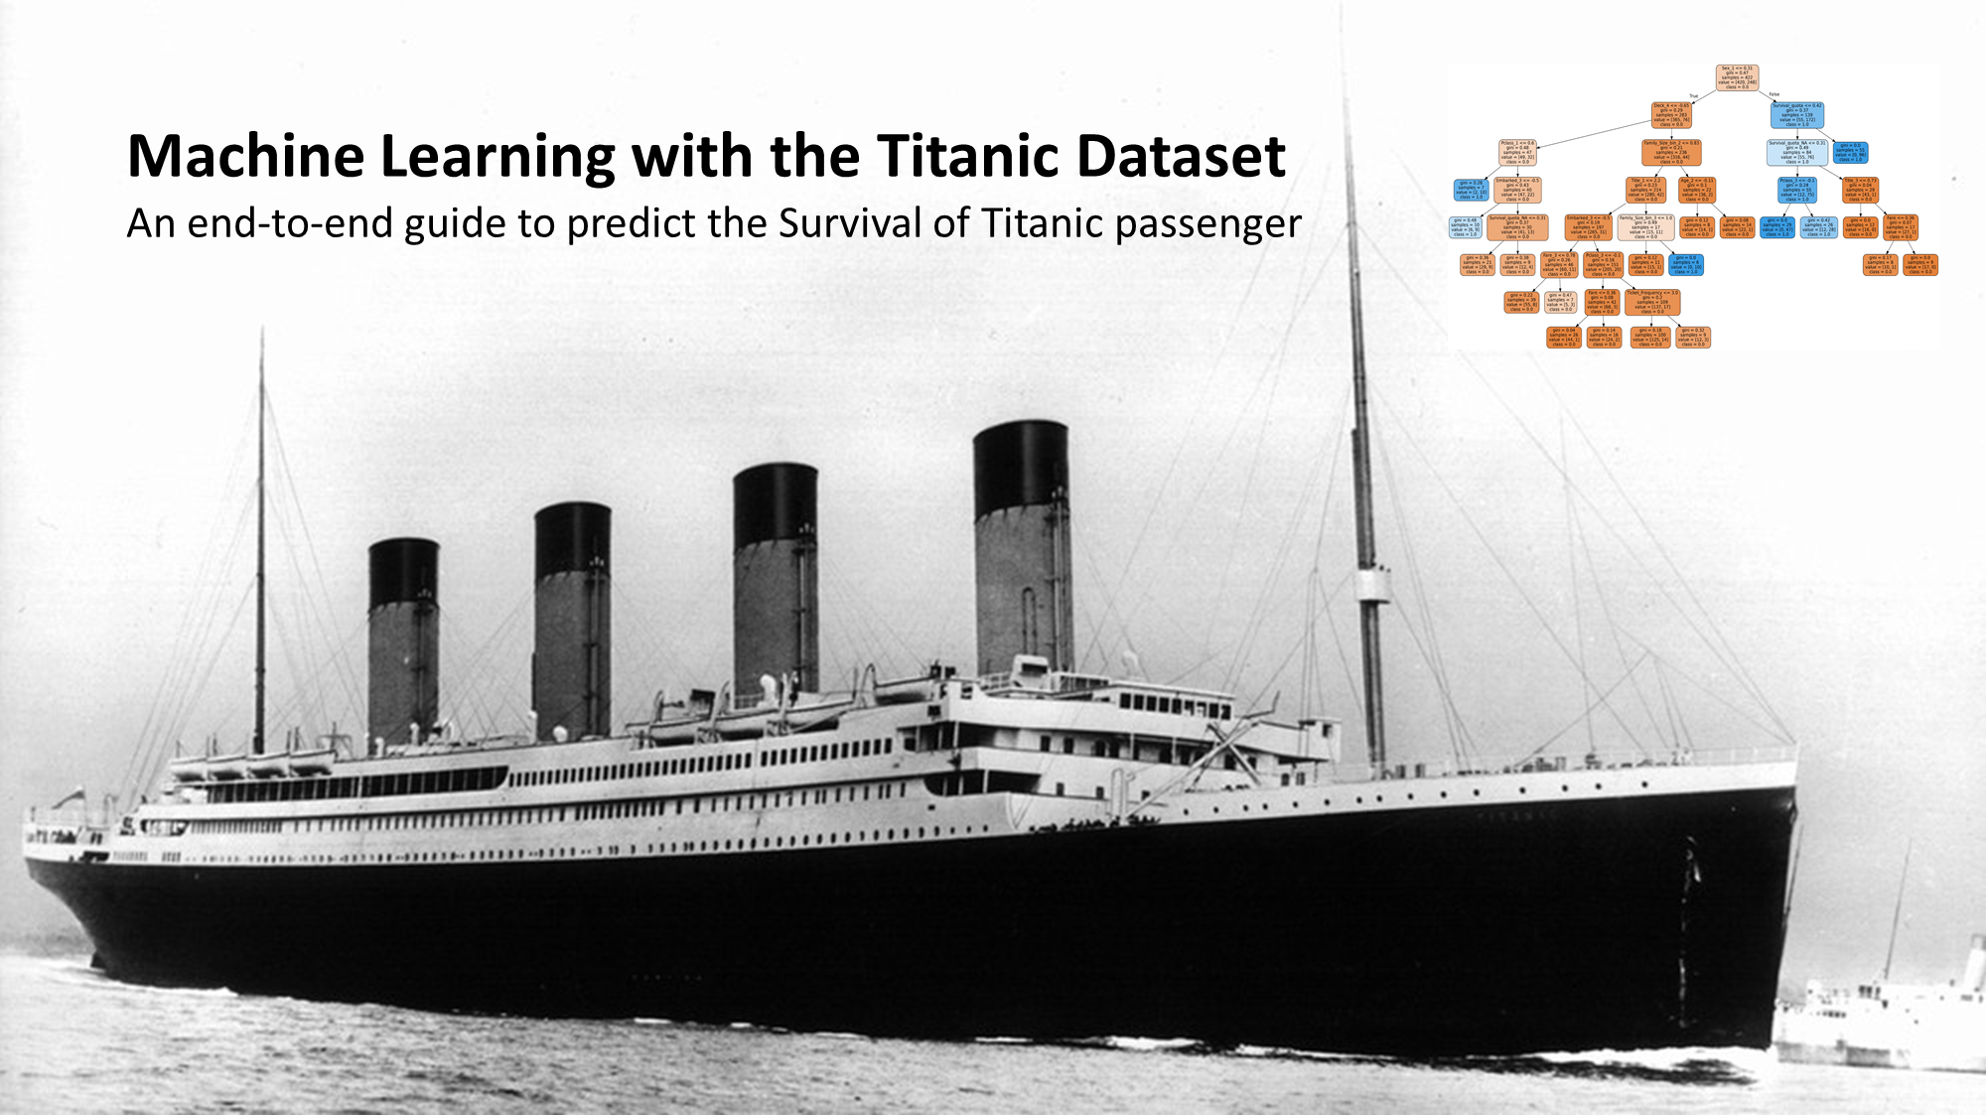

In [37]:
from IPython.display import Image
Image('C:/Users/hi/Pictures/Book/1_qTqs-DD_i5dqUtTuaVzfWw.png')


## Real Face of Titanic ship:::

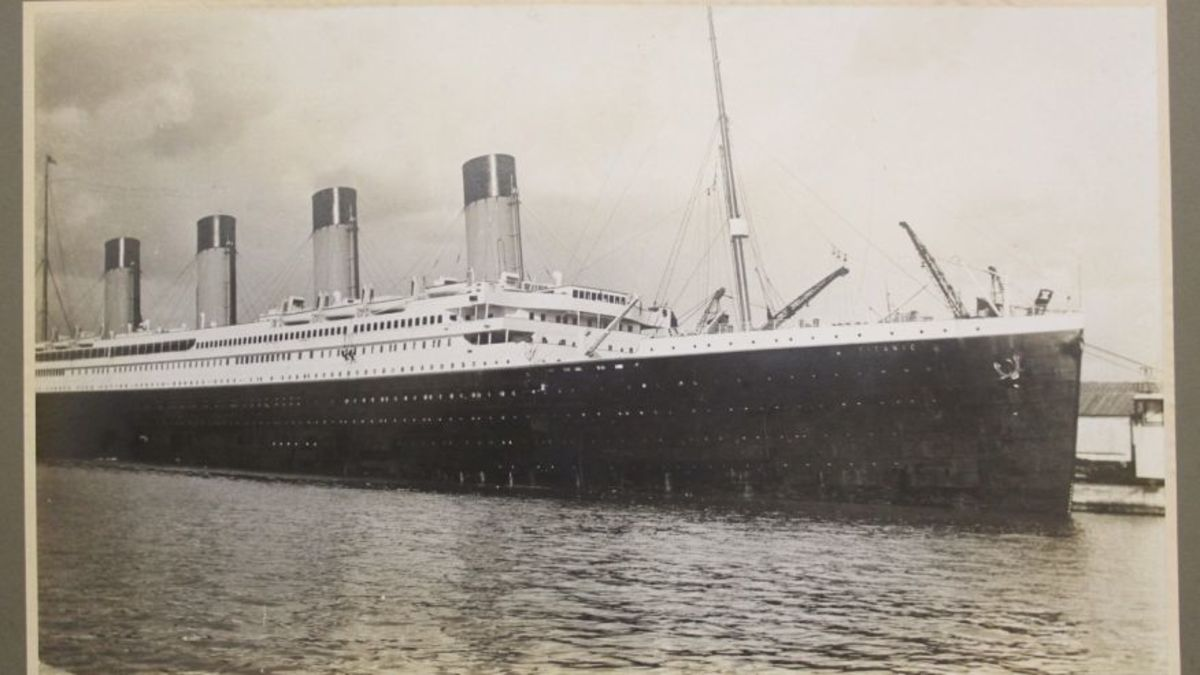

In [38]:
from IPython.display import Image
Image('C:/Users/hi/Pictures/Book/hith-titanic-photo-auction-aldredge-1-2.jpg')

# READING OF TITANIC FILE:

In [39]:
titanic= pd.read_csv('D:/PGP_DSE/NPV/titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**CHECKING THE NULL VALUES:**

In [40]:
titanic.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin has some NaN values, which can affect our graphical represntation:

Above method is not a proper way to tackle out the null values.

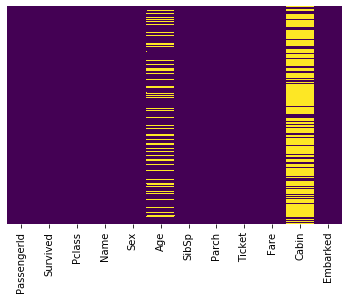

In [42]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Here we get a good information that, Age and Cabin parameter do have a huge numbers of null values.

**I want to know count of people travelling into the ship.**

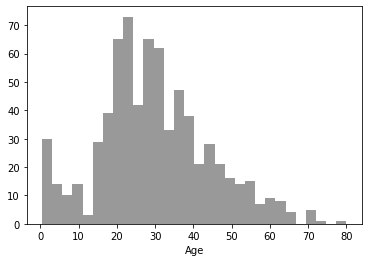

In [43]:
sns.distplot(titanic['Age'].dropna(), bins=30, kde=False, color='black')
plt.show()

Here we can obsereve that how the ratio is varying about the peole were exist into the ship.

Iniitially we removed the NaN values from the Age series, because we are not able to get the specific graph on NaN values.

Lets take the first bin:

**From the age of 1 approximately kids were present in that ship.Hence from 1 to 3 years old, 30 kids were there into the ship.**

**Avarage of 20 ot 32 of aged guys were travelling into that ship.**

**There were very much less amount of people, travelling who were out of 72.**

Like wise, we can see each bin, and can study the appearence of the passangers.

# DATA CLEANING:

Rather removing null values, we put some values into the data. If we remove all the null values, we can get a huge loss in our results.

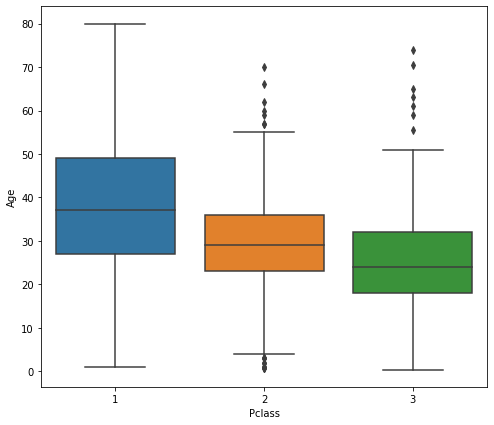

In [44]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Pclass', y='Age',data=titanic )
plt.show()

Here we see the avarage Ages according to class.

In [45]:
def age_b(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        if Pclass==1: 
            return 38
        
        elif Pclass==2:
            return 28
        
        else:
            return 24
    else:
        return Age

In [46]:
# Applying this function:
titanic['Age']=titanic[['Age','Pclass']].apply(age_b, axis=1)

**Now checking null values:**

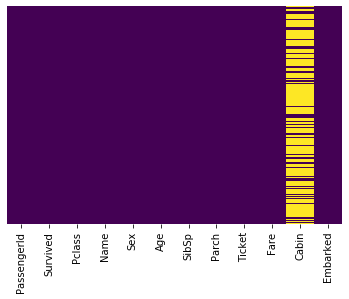

In [47]:
sns.heatmap(titanic.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Now we see not any null values into the series of Age.**

Since we are observing that Cabin has a lot of null values. Hence rather doing of further any feature engineering, we should drop such column.

In [48]:
titanic.drop('Cabin', axis=True, inplace=True)

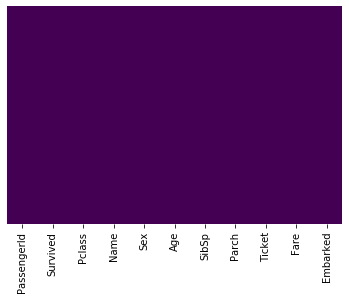

In [49]:
sns.heatmap(titanic.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Now we see the handled data.**

**I want to know the ratio of servived and not servived into the ship:**

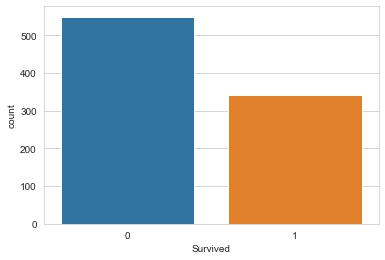

In [50]:
sns.set_style('whitegrid') # It must be in first line.
sns.countplot(x='Survived',data=titanic)
plt.show()

More than 500 people are not survived and more than 300 people are survived.

**I want to know gender wise, survived and not survived.**

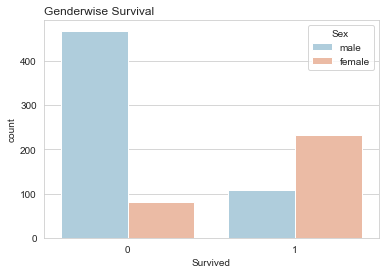

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=titanic, palette='RdBu_r' )
plt.title(label='Genderwise Survival', loc='left',)
plt.show()

Here a huge thing we see, that many male dead into that incident. And less numbers of women dead.  

**One prediction can be made that, the reason of dying of male is becuase of their sacrifices, that as soon as the accident took place, all male approached to save others, kids, females or olders etc.** 

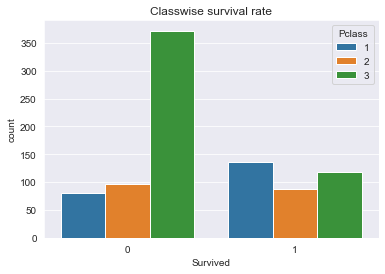

In [52]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass',data=titanic)
plt.title(label='Classwise survival rate', loc='center',)
plt.show()

It is a  huge thing again come in front:

**Survival rate of the paople of higher class is high, the reason could be they would be paid more money to survive them, or 1st class would be more secured.** 

**I want to know, how many people were travelling wiht their families, or alone:**

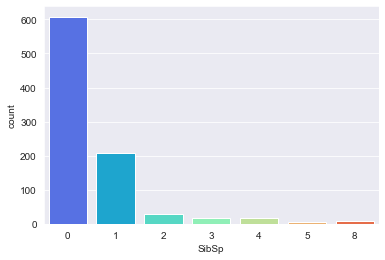

In [53]:
sns.set_style('darkgrid')
sns.countplot('SibSp',palette='rainbow',data=titanic)
plt.show()

**There were approximately high(600) people were travelling alone.**

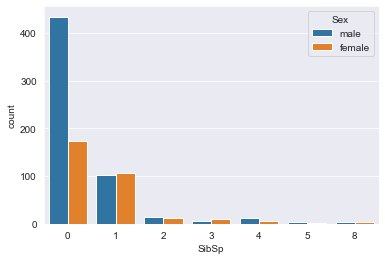

In [54]:
sns.set_style('darkgrid')
sns.countplot(x='SibSp',data=titanic, hue='Sex', )
plt.show()

**Now here we see, there were high amount of males who were alone.**

**Here we observe that approximately 100 coulpes were there into the ship.**

In [55]:
sns.set_style('darkgrid')

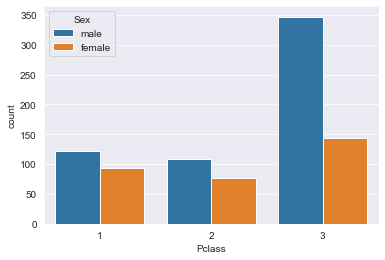

In [56]:
sns.countplot(x=titanic.Pclass, hue=titanic.Sex)
plt.show()

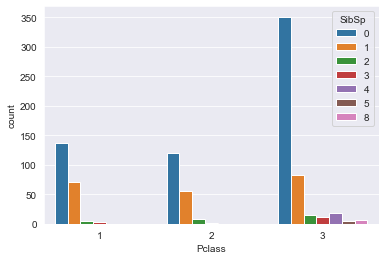

In [57]:
sns.countplot(x=titanic.Pclass, hue=titanic.SibSp)
plt.show()

# Some extra activities:

We have some categories i.e. **Sex** and **Embarked**.

In [58]:
embark=pd.get_dummies(titanic['Embarked'], drop_first=True ).head()
sex=pd.get_dummies(titanic['Sex'])

In [59]:
titanic.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [60]:
titanic.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [61]:
titanic2=pd.concat([titanic, sex, embark], axis=1)
titanic2.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  female  male  \
0            1         0       3  22.0      1      0   7.2500       0     1   
1            2         1       1  38.0      1      0  71.2833       1     0   
2            3         1       3  26.0      0      0   7.9250       1     0   
3            4         1       1  35.0      1      0  53.1000       1     0   
4            5         0       3  35.0      0      0   8.0500       0     1   

     Q    S  
0  0.0  1.0  
1  0.0  0.0  
2  0.0  1.0  
3  0.0  1.0  
4  0.0  1.0

**Now this data is quite good access.**

## Some Statistical Activities

In [62]:
titanic= pd.read_csv('D:/PGP_DSE/NPV/titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Univariate Analysis:

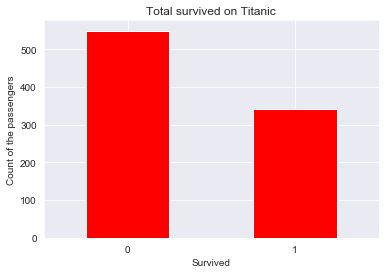

In [63]:
sns.set_style('darkgrid')
titanic.Survived.value_counts().plot(kind='bar', color='r')
plt.xlabel('Survived')
plt.ylabel('Count of the passengers')
plt.title('Total survived on Titanic')
plt.xticks(rotation=0)
plt.show()

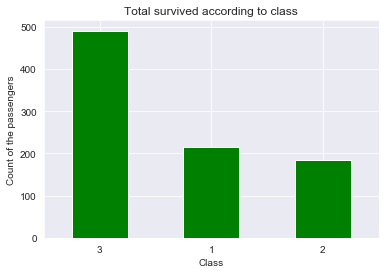

In [64]:
titanic.Pclass.value_counts().plot(kind='bar', color='g')
plt.xlabel('Class')
plt.ylabel('Count of the passengers')
plt.title('Total survived according to class')
plt.xticks(rotation=0)
plt.show()

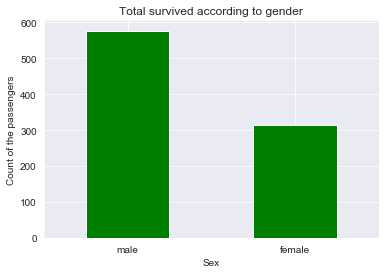

In [65]:
titanic.Sex.value_counts().plot(kind='bar', color='g')
plt.xlabel('Sex')
plt.ylabel('Count of the passengers')
plt.title('Total survived according to gender')
plt.xticks(rotation=0)
plt.show()

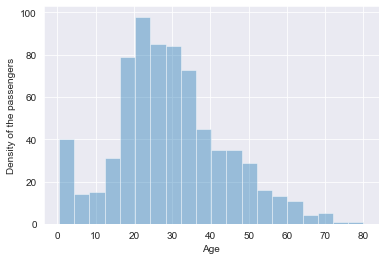

In [66]:
sns.distplot(titanic.Age.dropna(), kde=False)
plt.ylabel('Density of the passengers')
plt.show()

### Feature Engineering on the data set:

In [67]:
titanic['Family'] = titanic.SibSp + titanic.Parch + 1

In [68]:
titanic.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  Family  
0      0  A/5 21171   7.2500   NaN        S       2  
1      0   PC 17599  71.2833   C85        C       2

**Here we got a list of people who came up with their families.**

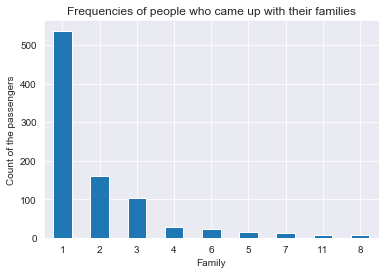

In [69]:
titanic.Family.value_counts().plot(kind = "bar")
plt.xlabel('Family')
plt.ylabel('Count of the passengers')
plt.title('Frequencies of people who came up with their families')
plt.xticks(rotation=0)
plt.show()

### Binning the attribute:

In [70]:
def family(x):
    if x > 4:
        return 'Gaint family'
    elif x==3:
        return 'Medium family'
    elif x == 2:
        return 'Small family'
    else:
        return 'Single'

In [71]:
titanic['Family_Cat'] = pd.Series(titanic.Family.apply(family))

In [72]:
titanic.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  Family    Family_Cat  
0      0  A/5 21171   7.2500   NaN        S       2  Small family  
1      0   PC 17599  71.2833   C85        C       2  Small family

**Relation of Families with surival:**

In [73]:
pd.crosstab(titanic.Survived, titanic.Family_Cat)

Family_Cat  Gaint family  Medium family  Single  Small family
Survived                                                     
0                     52             43     382            72
1                     10             59     184            89

**Giant families died with more members.**

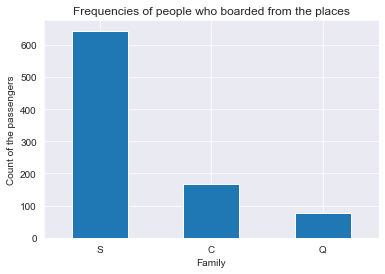

In [74]:
titanic.Embarked.value_counts().plot(kind='bar')
plt.xlabel('Family')
plt.ylabel('Count of the passengers')
plt.title('Frequencies of people who boarded from the places')
plt.xticks(rotation=0)
plt.show()

### Summery of the Univriate graphs:

* All it was observed about the survival density, how many they survived according to gender and class.
* There were mostly young people were travelling of 20-25 years old.
* There were many people who came single, and the the people who didn't survive were from the higher family members.
* We can say, the people from higher frequency of the families died, may be the reason **They were trying to save their relatives**.

### Bivariate Analysis:

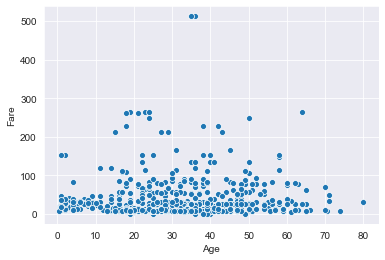

In [75]:
sns.scatterplot(titanic.Age, titanic.Fare)
plt.show()

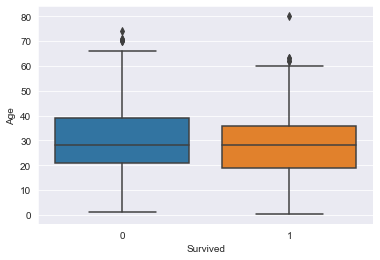

In [76]:
sns.boxplot(x='Survived', y ='Age', data=titanic)
plt.show()

### Is there any younger with no Fare?

**Answer:**

In [77]:
L=[]
for i in (list(titanic.loc[titanic.Fare==0,'Age'].value_counts().index)):
    L.append(i)
    print(i)    

38.0
39.0
49.0
19.0
25.0
40.0
36.0


These were the guys with no Fare.

In [78]:
Fare_z = titanic.loc[titanic.Fare==0,:]
Fare_z

PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robert J  male   
806          807         0       1            Andrews, Mr. Thomas Jr  male   
815          816         0       1                  Fry, Mr. Richard  male   
822          823         0       1   Reuchlin, Jonkheer. John George  male   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Family Family_Cat  
179  36.0      0      0    LINE   0.0   NaN        S       1     Single  
263  40.0      0      0  112059   0.0   B94        S       1     Single  
271  25.0      0      0    LINE   0.0   NaN        S       1     Single  
277   NaN      0      0  239853   0.0   NaN        S       1     Single  
302  19.0      0      0    LINE   0.0   NaN        S       1     Single  
413   NaN      0      0  239853   0.0   NaN        S       1     Single  
466   NaN      0      0  239853   0.0   NaN        S       1     Single  
481   NaN      0      0  239854   0.0   NaN        S       1     Single  
597  49.0      0      0    LINE   0.0   NaN        S       1     Single  
633   NaN      0      0  112052   0.0   NaN        S       1     Single  
674   NaN      0      0  239856   0.0   NaN        S       1     Single  
732   NaN      0      0  239855   0.0   NaN        S       1     Single  
806  39.0      0      0  112050   0.0   A36        S       1     Single  
815   NaN      0      0  112058   0.0  B102        S       1     Single  
822  38.0      0      0   19972   0.0   NaN        S       1     Single

### Now just look the route of the Titic:

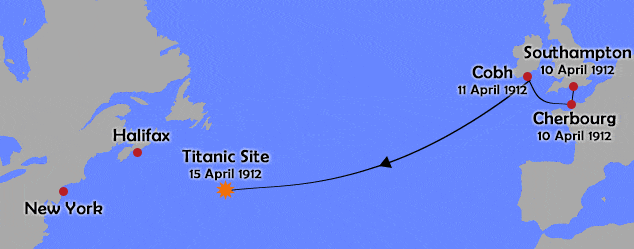

In [79]:
from IPython.display import Image
Image('C:/Users/hi/Pictures/Book/titanic-maiden-voyage-route.gif')

### Departure was from Southhampton. From Southhampton to Cherboug. From Cherbough it was about to go to Queenstown. Finally after Queenstown there was not any embarking point. It had to arrive to NewYourk.

* **It started the journey by 10 April 1912. To the same day it took the passengers from Cherbourg, exactly to the next day 11 April Queenstown passengers embarked.**

* **The incident happened after 4 days which mean on 15 April, it was 11:40 pm IST.** 

### Here we see that, the route indeed started from Southhamton. Actual by looking above the extracted data set, all are embarked from the place when shif actually departed, and their age were not more, between 20-50. Which means we can say they were staff members.

### Our assumption fits very much true when we see their Family count, that they are departed single with starting place. That only one survived from them since that guy was belongs to last PClass.

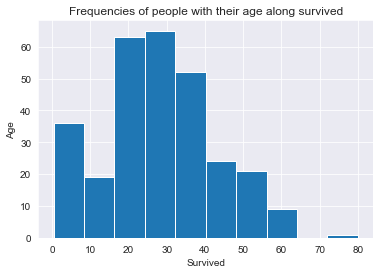

In [80]:
titanic.loc[titanic.Survived==1, "Age"].hist()
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Frequencies of people with their age along survived')
plt.xticks(rotation=0)
plt.show()

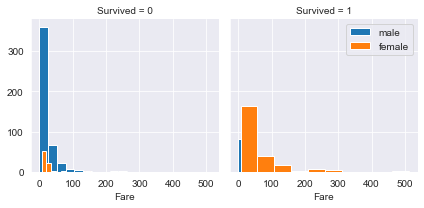

In [81]:
# Fare wise surived.
x = sns.FacetGrid(titanic, col = 'Survived', hue = "Sex")
x.map(plt.hist, "Fare")
plt.legend()
plt.show()

### Here we observed, that Male did not survive with respect to the female. 

#### The people who paid more were male and they survived. Most of the people were from the middle cast that they did  not pay high with low class, and they faced issues and they were not able to survive.

### Even this could also happen: The male tried to rescue the ladies and kids, this was theh cuase they put their lives in danger and they died.

### Evidence of our assumption:

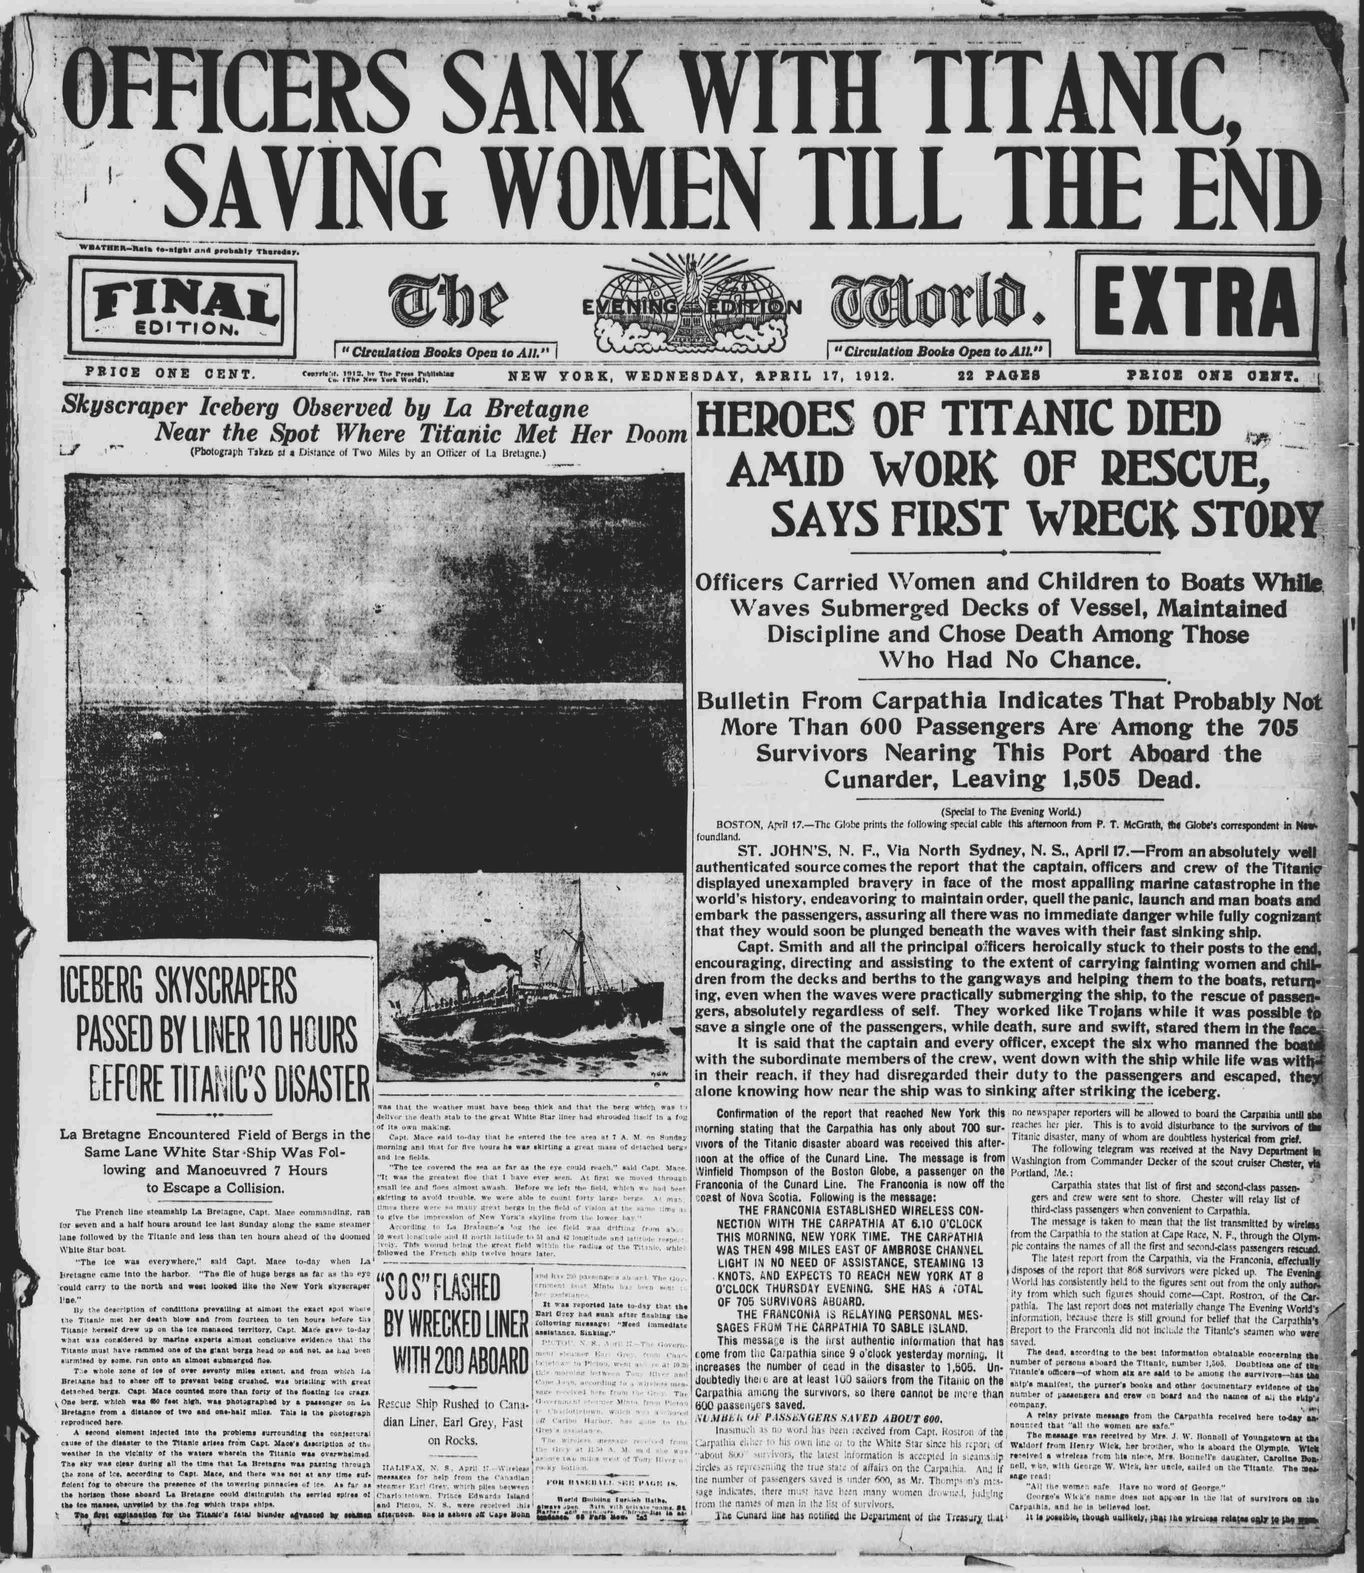

In [82]:
from IPython.display import Image
Image('C:/Users/hi/Pictures/Book/0d4126838b9ba0d231d54ef1af57d1e9.jpg')

### Just keeping the values:

In [83]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Hence we can put the value according this analysis:

In [84]:
titanic.Age.fillna(titanic.Age.median(), inplace = True)

In [85]:
titanic.Age.isnull().sum()

0

### No null values:

---------------

### Question: Estimation

**Is there any concern of Fare to the age? Hence we can see the children are having Fare with variance, which can prove the existence of Staff.**

#### Hypothesis:

* **H0: No Change in Fare and Age**
* **H1: It has change in Fare and Age with the relation in Age to the Fare**

In [86]:
sts, pvalue = st.ttest_ind(titanic.Fare, titanic.Age)
print('tstat:',sts, '\nP_value:',pvalue)
print()
if pvalue > 0.05:
    print('We are failed to reject null hypothesis.')
else:
    print('We reeject null hypothesis.')

tstat: 1.6517448796950809 
P_value: 0.09876295124022455

We are failed to reject null hypothesis.


### Here we assumed our null hypothesis that there is no change in their mean respectively, wwhich gives the idea that shows there is no relation in Fare with Age.

* #### The children who were very smaller who are also come by ticket. They have paid. 
* #### The people who have not paid the Fare they are definitely belong to theh staff member.

### Question: Estimation

**Is there any concern of Pclass with the Fare and Suruvived.**

### Hypothesis:

* #### H0: Survival count and Fare was not affect by Class of the ship.
* #### H1: Class has nothing to do with Fare and Survival.

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Fare~Pclass", data = titanic).fit()
sm.stats.anova_lm(model)

df        sum_sq        mean_sq           F        PR(>F)
Pclass      1.0  6.636250e+05  663624.976929  384.547434  1.967386e-71
Residual  889.0  1.534174e+06    1725.729827         NaN           NaN

In [88]:
teststats, pvalue, df, exp_freq = st.chi2_contingency(pd.crosstab(titanic.Pclass, titanic.Survived))
print(pvalue,'\n')
if pvalue > 0.05:
    print('No connection')
else: 
    print('It has the connection.')

4.549251711298793e-23 

It has the connection.


### We observed the positive connection with the Class of the ship with the survival count. Hence we pretend that higher the class more people were safe and survived.

In [89]:
print('This is the count of the people class wise:')
print(titanic.Pclass.value_counts())
titanic.Pclass.value_counts().sum()

This is the count of the people class wise:
3    491
1    216
2    184
Name: Pclass, dtype: int64


891

-----------------

### A little glance to take a difference of the class with survival:

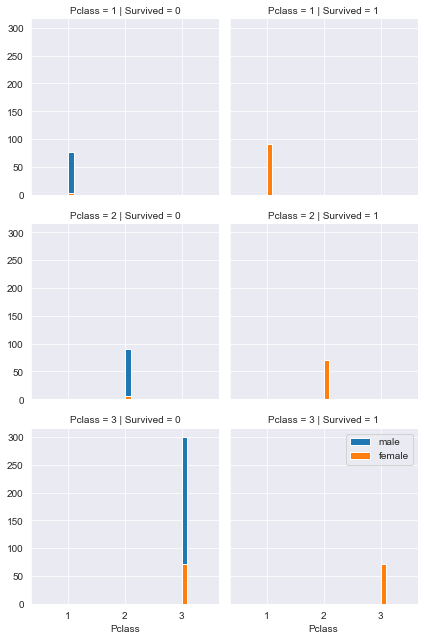

In [90]:
x = sns.FacetGrid(titanic,row='Pclass', col = 'Survived', hue='Sex')
x.map(plt.hist, 'Pclass')
plt.legend()
plt.show()

**Here we observe an amazing thing. In first class very little amount of female died. For as much many male died. The ratio of the second class was als similar. But there is a difference in the count  of people died and lived.**

#### We can observe that the last class was having a different situation that female died more as compared to the first class and second class. But again Yes! count of male deth is still high into the last class.

### Here we have the list of the people of 3rd class who dead.

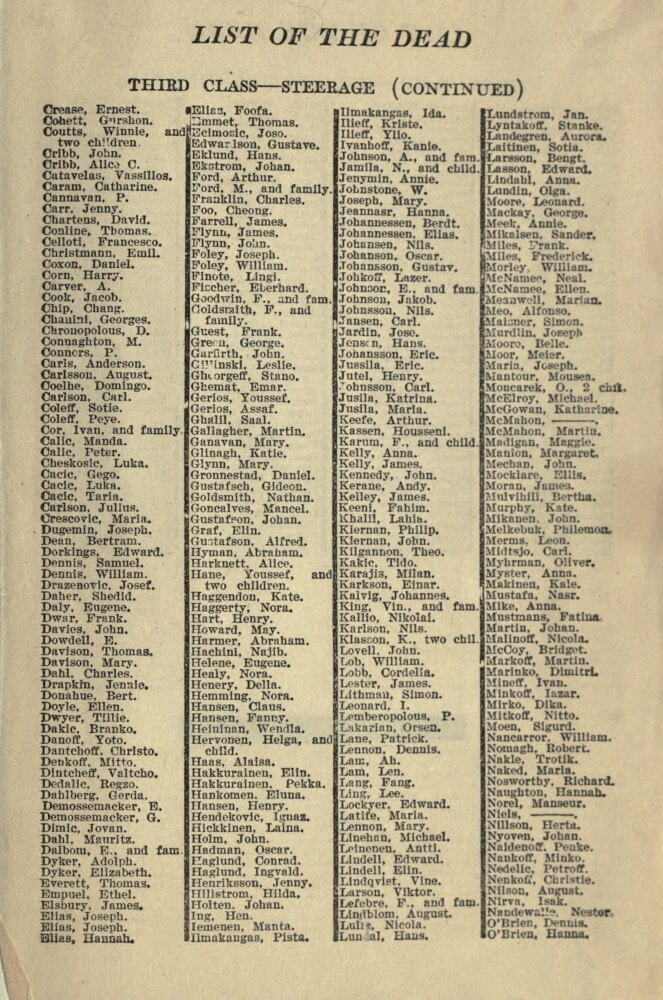

In [91]:
from IPython.display import Image
Image('C:/Users/hi/Pictures/Book/11ece8b764c454448913d9.jpg')

#### Let's check weather Embarked has some relation with Fare:

### Hypothesis:

* **H0: Passengers who boarded from the place had nothing to do with Fare.**
* **H1: The place where passengers boarded, can show the high rate with the wealth of the place.**

In [92]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Fare~Embarked", data = titanic).fit()
sm.stats.anova_lm(model)

df        sum_sq       mean_sq          F        PR(>F)
Embarked    2.0  1.738579e+05  86928.974232  38.140305  1.289645e-16
Residual  886.0  2.019362e+06   2279.189266        NaN           NaN

**Here our pvalue<0.05, hence we are rejecting our null hypothesis that shows no concern. Here we can elaborate the point that the place where people embarked is really showing the wealth of the people.**

In [93]:
max_fare = pd.pivot_table(data = titanic, index='Embarked', values='Fare', aggfunc=max).sort_values(by='Fare', ascending=False)
max_fare

Fare
Embarked          
C         512.3292
S         263.0000
Q          90.0000

In [94]:
min_fare = pd.pivot_table(data = titanic, index='Embarked', values='Fare', aggfunc=min).sort_values(by='Fare', ascending=False)
min_fare

Fare
Embarked        
Q         6.7500
C         4.0125
S         0.0000

In [95]:
total_fare = pd.pivot_table(data = titanic, index='Embarked', values='Fare', aggfunc=sum).sort_values(by='Fare', ascending=False)
total_fare

Fare
Embarked            
S         17439.3988
C         10072.2962
Q          1022.2543

#### Here we displayed the Fare strength of all the cities:
* ### S: Southhampton
* ### C: Cherbourg
* ### Q: Queentown

### We can oberve the maximum fare was paid by the passengers who were from Cherbourg

In [96]:
titanic[(titanic.Fare==titanic.Fare.values.max())]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
258  female  35.0      0      0  PC 17755  512.3292          NaN        C   
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
737    male  35.0      0      0  PC 17755  512.3292         B101        C   

     Family    Family_Cat  
258       1        Single  
679       2  Small family  
737       1        Single

In [97]:
titanic[(titanic.Fare>=450)]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
258  female  35.0      0      0  PC 17755  512.3292          NaN        C   
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
737    male  35.0      0      0  PC 17755  512.3292         B101        C   

     Family    Family_Cat  
258       1        Single  
679       2  Small family  
737       1        Single

#### Right here we made two observed tables which are showing the same stuff we have made like. We have seen that the people embarked from Cherbourg were belong to 1st class. Hence we can predict Cherbourg is more wealthy place.

---------------------------------

In [98]:
titanic[(titanic.Pclass==1)&(titanic.Embarked=='C')].shape[0]/titanic[titanic.Pclass==1].shape[0]*100

39.351851851851855

In [99]:
titanic[(titanic.Pclass==1)&(titanic.Embarked=='Q')].shape[0]/titanic[titanic.Pclass==1].shape[0]*100

0.9259259259259258

In [100]:
titanic[(titanic.Pclass==1)&(titanic.Embarked=='S')].shape[0]/titanic[titanic.Pclass==1].shape[0]*100

58.79629629629629

### Here we assumed that more people are embarked from Southhampton. Hence this place seems to be quite more wealtheir than Cherbourg. 

#### Let's these wealthy places on earth:

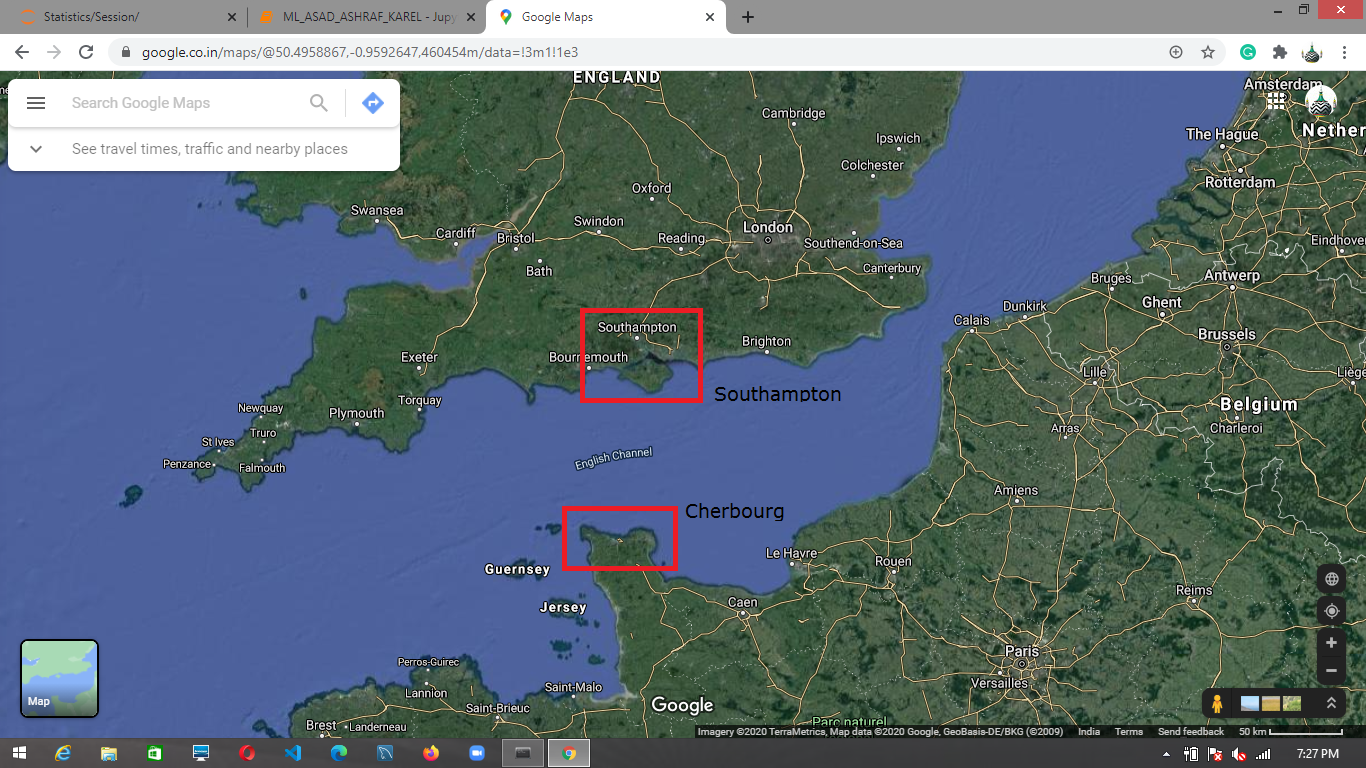

In [101]:
from IPython.display import Image
Image('C:/Users/hi/Pictures/Book/Screenshot (638).png')

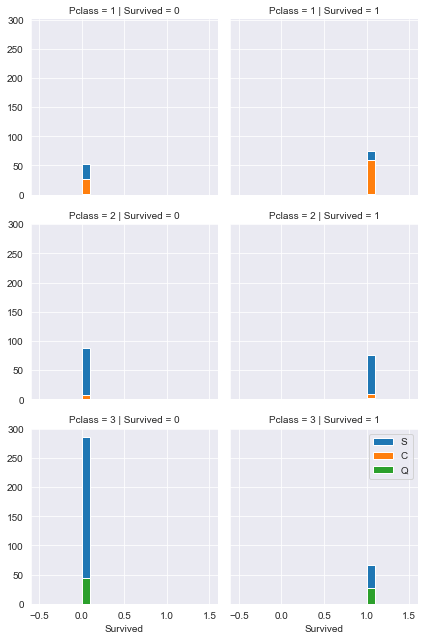

In [102]:
x = sns.FacetGrid(titanic,row='Pclass', col = 'Survived', hue='Embarked')
x.map(plt.hist, 'Survived')
plt.legend()
plt.show()

### Above visualization shows an extreme observations:

* **There were all people accomodating all passenger class(s) with all 3 places. We observe 1st class people death range was quite harder, even the people of Southampton dead a lot.**
* **The smilar thing we can experience about Southampton in all both classes.**
* **Though there were only 0.9% of people were accomoated in first class from Queentwon [According to the analysis], hence their death ratio was quite low to compare with the other places.**

---------------------

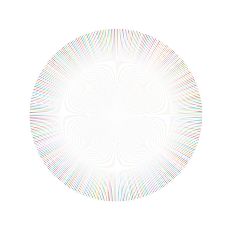

In [103]:
plt.pie(data=titanic, x= 'Survived')
plt.show()

## This how we can make a good observation and prediction on any dataset. The thing is we must be familier with multiple Exploraory Data Analysis and all fundamental Statistical concepts. 

# END